## Introduction

This worksheet focuses on implementing and understanding the McCulloch-Pitts (MCP) neuron and the Perceptron model. Through this assignment, I will implement these models from scratch in Python and analyze their capabilities and limitations.

## Task 1: Implementation of MCP Neurons

The McCulloch-Pitts (MCP) neuron is one of the earliest computational models of a neuron, proposed in 1943. It's a simplified representation that processes binary inputs to produce binary outputs based on a threshold function.

### Implementation of MCP Neuron for AND Operation

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements basic AND operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    T (int): Threshold value.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the given inputs.
    """
    assert len(X1) == len(X2), "Input arrays must have the same length."

    state_neuron = []
    for x1, x2 in zip(X1, X2):
        if x1 + x2 >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2 # Threshold value
# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)
# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")

Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


### Implementation of MCP Neuron for OR Operation

In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    T (int): Threshold value.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the given inputs.
    """
    assert len(X1) == len(X2), "Input arrays must have the same length."

    state_neuron = []
    for x1, x2 in zip(X1, X2):
        if x1 + x2 >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1 # Threshold value for OR gate
# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)
# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")

Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


### Question 1: Limitations of MCP Neurons

The MCP neuron model, while historically significant as one of the first computational models of a neuron, has several key limitations:

1. **Binary Inputs and Output**: MCP neurons can only handle binary (0 or 1) inputs and produce binary outputs, limiting their applicability to real-world problems with continuous values.

2. **Fixed Weights**: The weights in MCP neurons are fixed (typically 1) and cannot be learned or adjusted based on data, making them incapable of adapting to patterns.

3. **No Learning Capability**: Unlike more advanced neural models, MCP neurons have no learning algorithm and must be manually configured.

4. **Cannot Solve Non-linearly Separable Problems**: MCP neurons cannot solve problems that require non-linear decision boundaries, such as the XOR problem.

5. **Limited Computational Power**: They can only implement simple logical functions (AND, OR, NOT) but struggle with more complex functions.

6. **Absence of Bias Term**: Without a learnable bias term, their decision boundary must pass through the origin, further limiting their flexibility.

7. **Temporal Processing**: They lack the ability to process sequential data or maintain state over time.

### Question 2: XOR Function using MCP Neurons

The XOR (exclusive OR) function cannot be implemented using a single MCP neuron because it is not linearly separable. This means no single straight line can separate the inputs that produce a 0 output from those that produce a 1 output.

However, we can implement XOR using multiple MCP neurons arranged in a network:

1. First layer:
   - Neuron 1: Implements OR function (threshold = 1)
   - Neuron 2: Implements AND function (threshold = 2)

2. Second layer:
   - Neuron 3: Takes output from Neuron 1 and inverted output from Neuron 2 (AND NOT)

This network structure effectively computes (X1 OR X2) AND NOT(X1 AND X2), which is the definition of XOR.

This demonstrates that while a single MCP neuron is limited, networks of MCP neurons can implement more complex functions. This insight was crucial for the development of multi-layer neural networks.

## Task 2: Perceptron Algorithm for 0 vs 1 Classification

The Perceptron extends the MCP neuron by incorporating learnable weights and an adaptive learning process. It serves as a linear binary classifier that can find a decision boundary between two classes of data.

### Loading and Visualizing the Dataset

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df_0_1 = pd.read_csv("./mnist_0_and_1.csv") # Add the correct file path if necessary

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values # 784 pixels
y = df_3_5["label"].values # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


### Answer to Question 1: What does the shape of X represent?

The shape of X represents the dimensions of our feature matrix. We have the output (12665, 784), it means we have:
- 12,665 samples (rows) - Each row represents one image of either digit 0 or digit 1
- 784 features (columns) - Each column represents one pixel value in the 28×28 = 784 pixel image

### Answer to Question 2: What does the shape of y represent?

The shape of y represents the dimensions of our label vector. If the output is something like (12665,), it means we have:
- 12,665 labels, one for each sample in our dataset
- Each value is either 0 or 1, indicating which digit the corresponding image represents

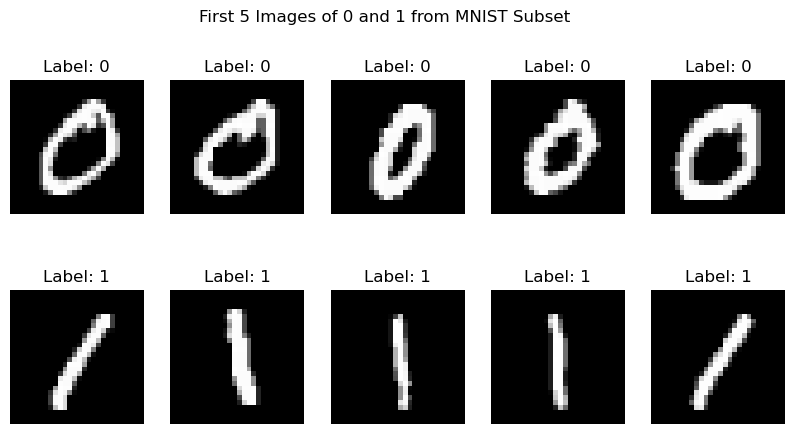

In [ ]:
import matplotlib.pyplot as plt

# Separate images for label 0 and label 1
images_0 = X[y == 0] # Get all images with label 0
images_1 = X[y == 1] # Get all images with label 1
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

### Initialize Weights and Bias

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

### Answer to Question 3: What does the weights array represent in this context?

The weights array represents the importance or contribution of each pixel (feature) to the classification decision. With 784 weights, there is one weight for each pixel in the 28×28 image. During training, these weights will be adjusted so that pixels that are more important for distinguishing between digits 0 and 1 will have larger absolute weight values.

### Answer to Question 4: Why are we initializing the weights to zero? What effect could this have on the training process?

We are initializing the weights to zero as a starting point for the perceptron learning algorithm. This is a common practice for the perceptron specifically because:

1. The perceptron algorithm is guaranteed to converge to a solution (if one exists) regardless of the initial weights.
2. Starting with zeros makes the first predictions uniform (all the same class), allowing the algorithm to systematically adjust weights based on misclassifications.

However, this initialization approach has limitations:
- If we were using more complex neural networks with gradient-based learning (like backpropagation), zero initialization would cause all neurons to learn the same features.
- For perceptrons on real data, zero initialization might make the algorithm start by classifying all samples as the same class, requiring more updates to correct.
- The direction of the first weight update is entirely determined by the first misclassified example, which can introduce some randomness in convergence.

### Implementation of Decision Function

In [ ]:
def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.
    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training
    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    # Activation function (step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all

### Training the Perceptron

In [ ]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.
    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)
    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct predictions after the final epoch.
    """
    for epoch in range(epochs):
        correct_predictions = 0
        for i in range(len(y)):
            # Compute the prediction
            linear_output = np.dot(X[i], weights) + bias
            y_pred = 1 if linear_output >= 0 else 0

            # Check if the prediction is correct
            if y_pred == y[i]:
                correct_predictions += 1

            # Update weights and bias if prediction is incorrect
            error = y[i] - y_pred
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

        # Print accuracy for the current epoch
        accuracy = correct_predictions / len(y)
        print(f"Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.2f}")

    return weights, bias, accuracy

### Answer to Question 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?

This line calculates the weighted sum of inputs plus the bias, which is the aggregated input to the perceptron. It performs the following operation:
- Multiplies each feature value by its corresponding weight
- Sums up all these products
- Adds the bias term

This computation is the linear part of the perceptron model before applying the activation function. The result determines which side of the decision boundary the input falls on. It's essentially computing the equation of a hyperplane in the feature space.

### Answer to Question 6: What happens when the prediction is wrong? How are the weights and bias updated?

When the prediction is wrong (the predicted label doesn't match the true label), the perceptron learning rule is applied to update the weights and bias:

1. For weights: `weights = weights + learning_rate * (true_label - predicted_label) * input_features`
2. For bias: `bias = bias + learning_rate * (true_label - predicted_label)`

This update moves the decision boundary in the direction that would correctly classify the misclassified example:
- If the true label is 1 but the prediction was 0, the weights are increased, making that input more likely to activate the perceptron next time.
- If the true label is 0 but the prediction was 1, the weights are decreased, making that input less likely to activate the perceptron next time.

The magnitude of the update is controlled by the learning rate, and the direction is determined by the input features of the misclassified example.

### Answer to Question 7: Why is the final accuracy important, and what do you expect it to be?

The final accuracy is important because it measures how well our perceptron model has learned to distinguish between digits 0 and 1. It tells us the proportion of correctly classified examples out of the total examples.

For the 0 vs 1 classification task, we should expect a very high accuracy (close to 100%) because:
1. Digits 0 and 1 have very distinct visual patterns that are easily distinguishable
2. This is a linearly separable problem, which the perceptron is guaranteed to solve perfectly given enough training iterations
3. The difference between these digits is clear even in low-resolution images (the central pixels for digit 1 are active, while digit 0 has an "empty" center with active pixels around the edges)

If the accuracy is significantly below 100%, it might indicate:
- Insufficient training iterations
- Too low learning rate
- Issues with the dataset (noisy or corrupted images)
- Implementation errors in the perceptron algorithm

### Putting it All Together

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100, Accuracy: 1.00
Epoch 2/100, Accuracy: 1.00
Epoch 3/100, Accuracy: 1.00
Epoch 4/100, Accuracy: 1.00
Epoch 5/100, Accuracy: 1.00
Epoch 6/100, Accuracy: 1.00
Epoch 7/100, Accuracy: 1.00
Epoch 8/100, Accuracy: 1.00
Epoch 9/100, Accuracy: 1.00
Epoch 10/100, Accuracy: 1.00
Epoch 11/100, Accuracy: 1.00
Epoch 12/100, Accuracy: 1.00
Epoch 13/100, Accuracy: 1.00
Epoch 14/100, Accuracy: 1.00
Epoch 15/100, Accuracy: 1.00
Epoch 16/100, Accuracy: 1.00
Epoch 17/100, Accuracy: 1.00
Epoch 18/100, Accuracy: 1.00
Epoch 19/100, Accuracy: 1.00
Epoch 20/100, Accuracy: 1.00
Epoch 21/100, Accuracy: 1.00
Epoch 22/100, Accuracy: 1.00
Epoch 23/100, Accuracy: 1.00
Epoch 24/100, Accuracy: 1.00
Epoch 25/100, Accuracy: 1.00
Epoch 26/100, Accuracy: 1.00
Epoch 27/100, Accuracy: 1.00
Epoch 28/100, Accuracy: 1.00
Epoch 29/100, Accuracy: 1.00
Epoch 30/100, Accuracy: 1.00
Epoch 31/100, Accuracy: 1.00
Epoch 32/100, Accuracy: 1.00
Epoch 33/100, Accuracy: 1.00
Epoch 34/100, Accuracy: 1.00
Epoch 35/100, Accuracy:

### Visualizing Misclassified Images

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)
# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")
# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]): # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


### Answer to Question 8: What does misclassified_idx store, and how is it used in this code?

The `misclassified_idx` variable stores the indices of all samples where the predicted label doesn't match the true label. It's created using `np.where(y_pred != y)[0]`, which returns the indices where the condition `y_pred != y` is true.

In the code, these indices are used to:
1. Determine if there are any misclassified images (`if len(misclassified_idx) > 0`)
2. Access and display the first 10 misclassified images (or fewer if there are less than 10)
3. Show both the predicted label and the true label for each misclassified image

This visualization helps us understand what types of images the perceptron struggles to classify correctly, which can provide insights into the model's limitations or potential issues with the dataset.

### Answer to Question 9: How do you interpret the result if the output is "All images were correctly classified!"?

If the output is "All images were correctly classified!", this means the perceptron has achieved perfect accuracy (100%) on the dataset. This can be interpreted as:

1. **Successful Learning**: The perceptron has successfully learned a decision boundary that perfectly separates digits 0 and 1.

2. **Linear Separability Confirmed**: It confirms that the 0 vs 1 classification problem is indeed linearly separable in the pixel space.

3. **Model Adequacy**: The simple perceptron model is sufficient for this particular classification task, without needing more complex models.

4. **Convergence of Algorithm**: The perceptron learning algorithm has converged to an optimal solution.

5. **Potential Overfitting**: If this is training data, perfect accuracy might indicate that the model has memorized the training examples rather than generalizing. We would need to evaluate on separate test data to confirm the model's true performance.

For the specific case of distinguishing between digits 0 and 1, perfect classification is actually expected since these digits have very distinct visual patterns that are easily separable with a linear model.

## Task 3: Perceptron Algorithm for 3 vs 5 Classification

In this task, we'll apply the same perceptron algorithm to classify digits 3 and 5, which is a more challenging problem than distinguishing between 0 and 1.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df_3_5 = pd.read_csv("./mnist_3_and_5.csv") # Add the correct file path if necessary

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values # 784 pixels
y = df_3_5["label"].values # Labels (3 or 5)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


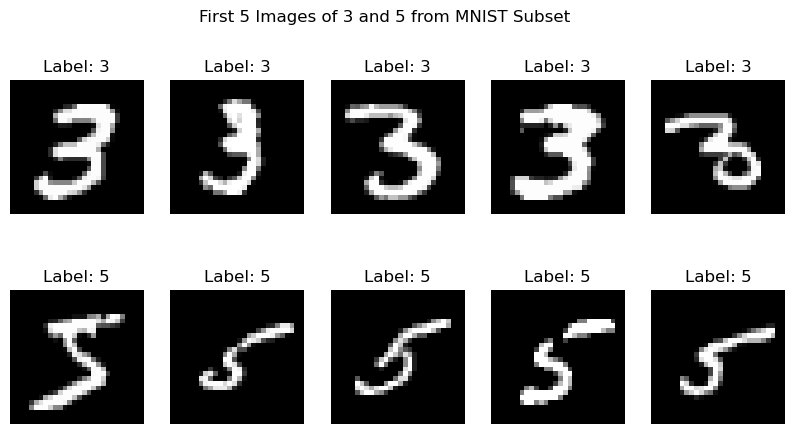

In [ ]:
import matplotlib.pyplot as plt

# Separate images for label 0 and label 1
images_3 = X[y == 3] # Get all images with label 3
images_5 = X[y == 5] # Get all images with label 5
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
# Check if the arrays have the required amount of data
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_3 or images_5 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100, Accuracy: 0.00
Epoch 2/100, Accuracy: 0.00
Epoch 3/100, Accuracy: 0.00
Epoch 4/100, Accuracy: 0.00
Epoch 5/100, Accuracy: 0.00
Epoch 6/100, Accuracy: 0.00
Epoch 7/100, Accuracy: 0.00
Epoch 8/100, Accuracy: 0.00
Epoch 9/100, Accuracy: 0.00
Epoch 10/100, Accuracy: 0.00
Epoch 11/100, Accuracy: 0.00
Epoch 12/100, Accuracy: 0.00
Epoch 13/100, Accuracy: 0.00
Epoch 14/100, Accuracy: 0.00
Epoch 15/100, Accuracy: 0.00
Epoch 16/100, Accuracy: 0.00
Epoch 17/100, Accuracy: 0.00
Epoch 18/100, Accuracy: 0.00
Epoch 19/100, Accuracy: 0.00
Epoch 20/100, Accuracy: 0.00
Epoch 21/100, Accuracy: 0.00
Epoch 22/100, Accuracy: 0.00
Epoch 23/100, Accuracy: 0.00
Epoch 24/100, Accuracy: 0.00
Epoch 25/100, Accuracy: 0.00
Epoch 26/100, Accuracy: 0.00
Epoch 27/100, Accuracy: 0.00
Epoch 28/100, Accuracy: 0.00
Epoch 29/100, Accuracy: 0.00
Epoch 30/100, Accuracy: 0.00
Epoch 31/100, Accuracy: 0.00
Epoch 32/100, Accuracy: 0.00
Epoch 33/100, Accuracy: 0.00
Epoch 34/100, Accuracy: 0.00
Epoch 35/100, Accuracy:

Final Accuracy: 0.0000


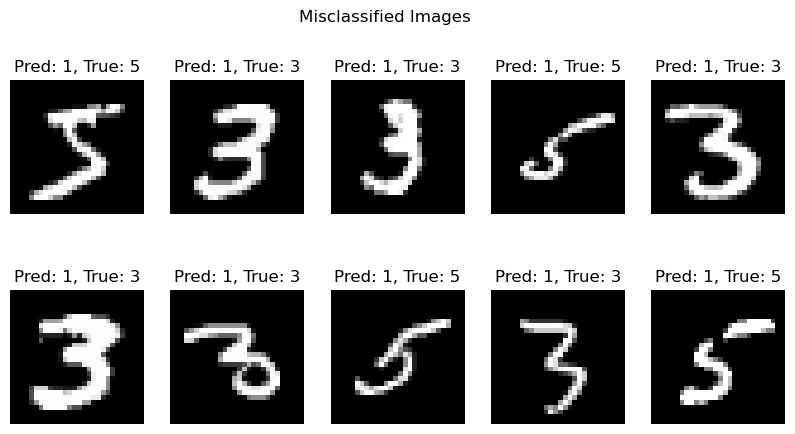

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)
# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")
# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]): # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")